In [1]:
import os
import sys
sys.path.insert(0, '..')

import pandas as pd
import geopandas as gpd
import numpy as np
import rioxarray
import xarray as xr
from ipyleaflet import Map, LayersControl, basemaps

import depal as dep
from model import add_image_values, get_model_prediction, get_overlay

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0, '..')
import depal as dep
import warnings
warnings.filterwarnings('ignore')

In [2]:
dep.init()

Initiating DEPAL...
<Client: 'tcp://127.0.0.1:37485' processes=4 threads=8, memory=32.00 GiB>
/user/nicholasm@spc.int/proxy/36135/status


In [3]:
from odc.stac import load
from pystac import Item

url_template = "https://deppcpublicstorage.blob.core.windows.net/output/wofs/0.0.1/wofs/{year}/wofs_{year}_FJ_019.stac-item.json"

In [4]:
items = []

for year in range(2015,2023):
    url = url_template.format(year=year)
    item = Item.from_file(url)
    items.append(item)

print(len(items))

8


In [5]:
data = load(items, chunks={})
data

<xarray.Dataset>
Dimensions:      (y: 3712, x: 3563, time: 8)
Coordinates:
  * y            (y) float64 -1.902e+06 -1.902e+06 ... -2.013e+06 -2.013e+06
  * x            (x) float64 3.018e+06 3.018e+06 ... 3.125e+06 3.125e+06
    spatial_ref  int32 3832
  * time         (time) datetime64[ns] 2023-08-23T22:09:36.411996 ... 2023-08...
Data variables:
    asset        (time, y, x) float32 dask.array<chunksize=(1, 3712, 3563), meta=np.ndarray>

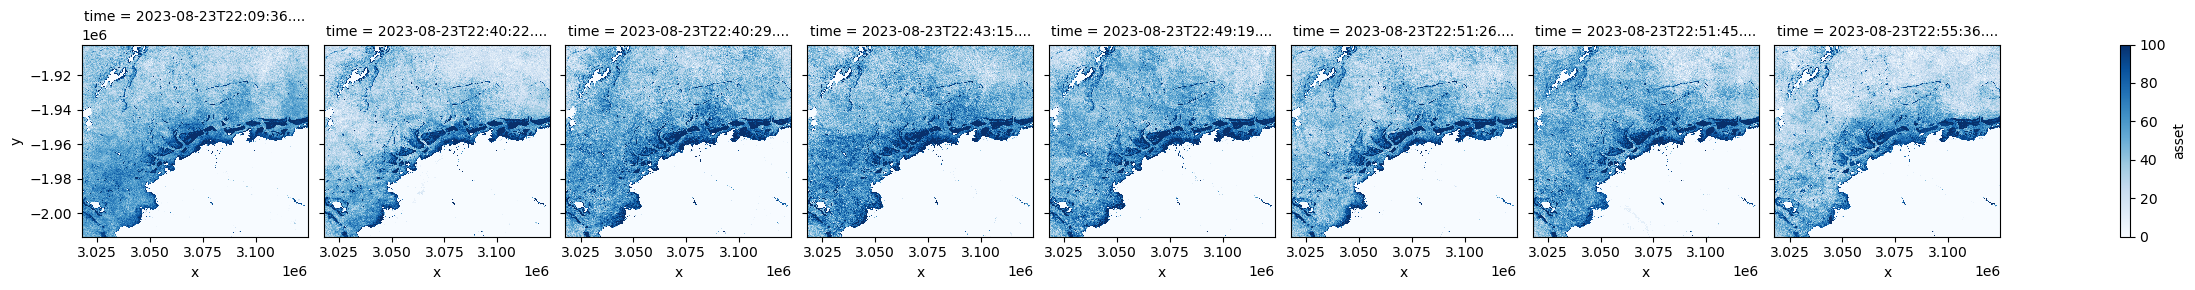

In [6]:
data.asset.plot(cmap="Blues", col="time")

In [13]:
wofs = [ms.ndvi(x.sel(band="nir"), x.sel(band="red")) for x in data]

ndvi = xr.concat(ndvi_aggs, dim="time")

ndvi.plot.imshow(x="x", y="y", col="time", col_wrap=5, cmap="RdYlGn"); #RdYlGn #viridis

NameError: name 'ms' is not defined

In [8]:
# aoi = [3110943,-1999061, 3127224,-1987145]
aoi = [177.96704,-17.76615,178.07057,-17.68005]

In [9]:
# data = load(items, bbox=aoi, crs="epsg:3832", resolution=30, chunks={})
data = load(items, bbox=aoi, crs="epsg:3832", resolution=30, chunks={})
data

<xarray.Dataset>
Dimensions:      (y: 335, x: 386, time: 8)
Coordinates:
  * y            (y) float64 -1.987e+06 -1.987e+06 ... -1.997e+06 -1.997e+06
  * x            (x) float64 3.113e+06 3.113e+06 ... 3.125e+06 3.125e+06
    spatial_ref  int32 3832
  * time         (time) datetime64[ns] 2023-08-23T22:09:36.411996 ... 2023-08...
Data variables:
    asset        (time, y, x) float32 dask.array<chunksize=(1, 335, 386), meta=np.ndarray>

In [10]:
data.time.values

array(['2023-08-23T22:09:36.411996000', '2023-08-23T22:40:22.427737000',
       '2023-08-23T22:40:29.677770000', '2023-08-23T22:43:15.578867000',
       '2023-08-23T22:49:19.783446000', '2023-08-23T22:51:26.927930000',
       '2023-08-23T22:51:45.390665000', '2023-08-23T22:55:36.340090000'],
      dtype='datetime64[ns]')

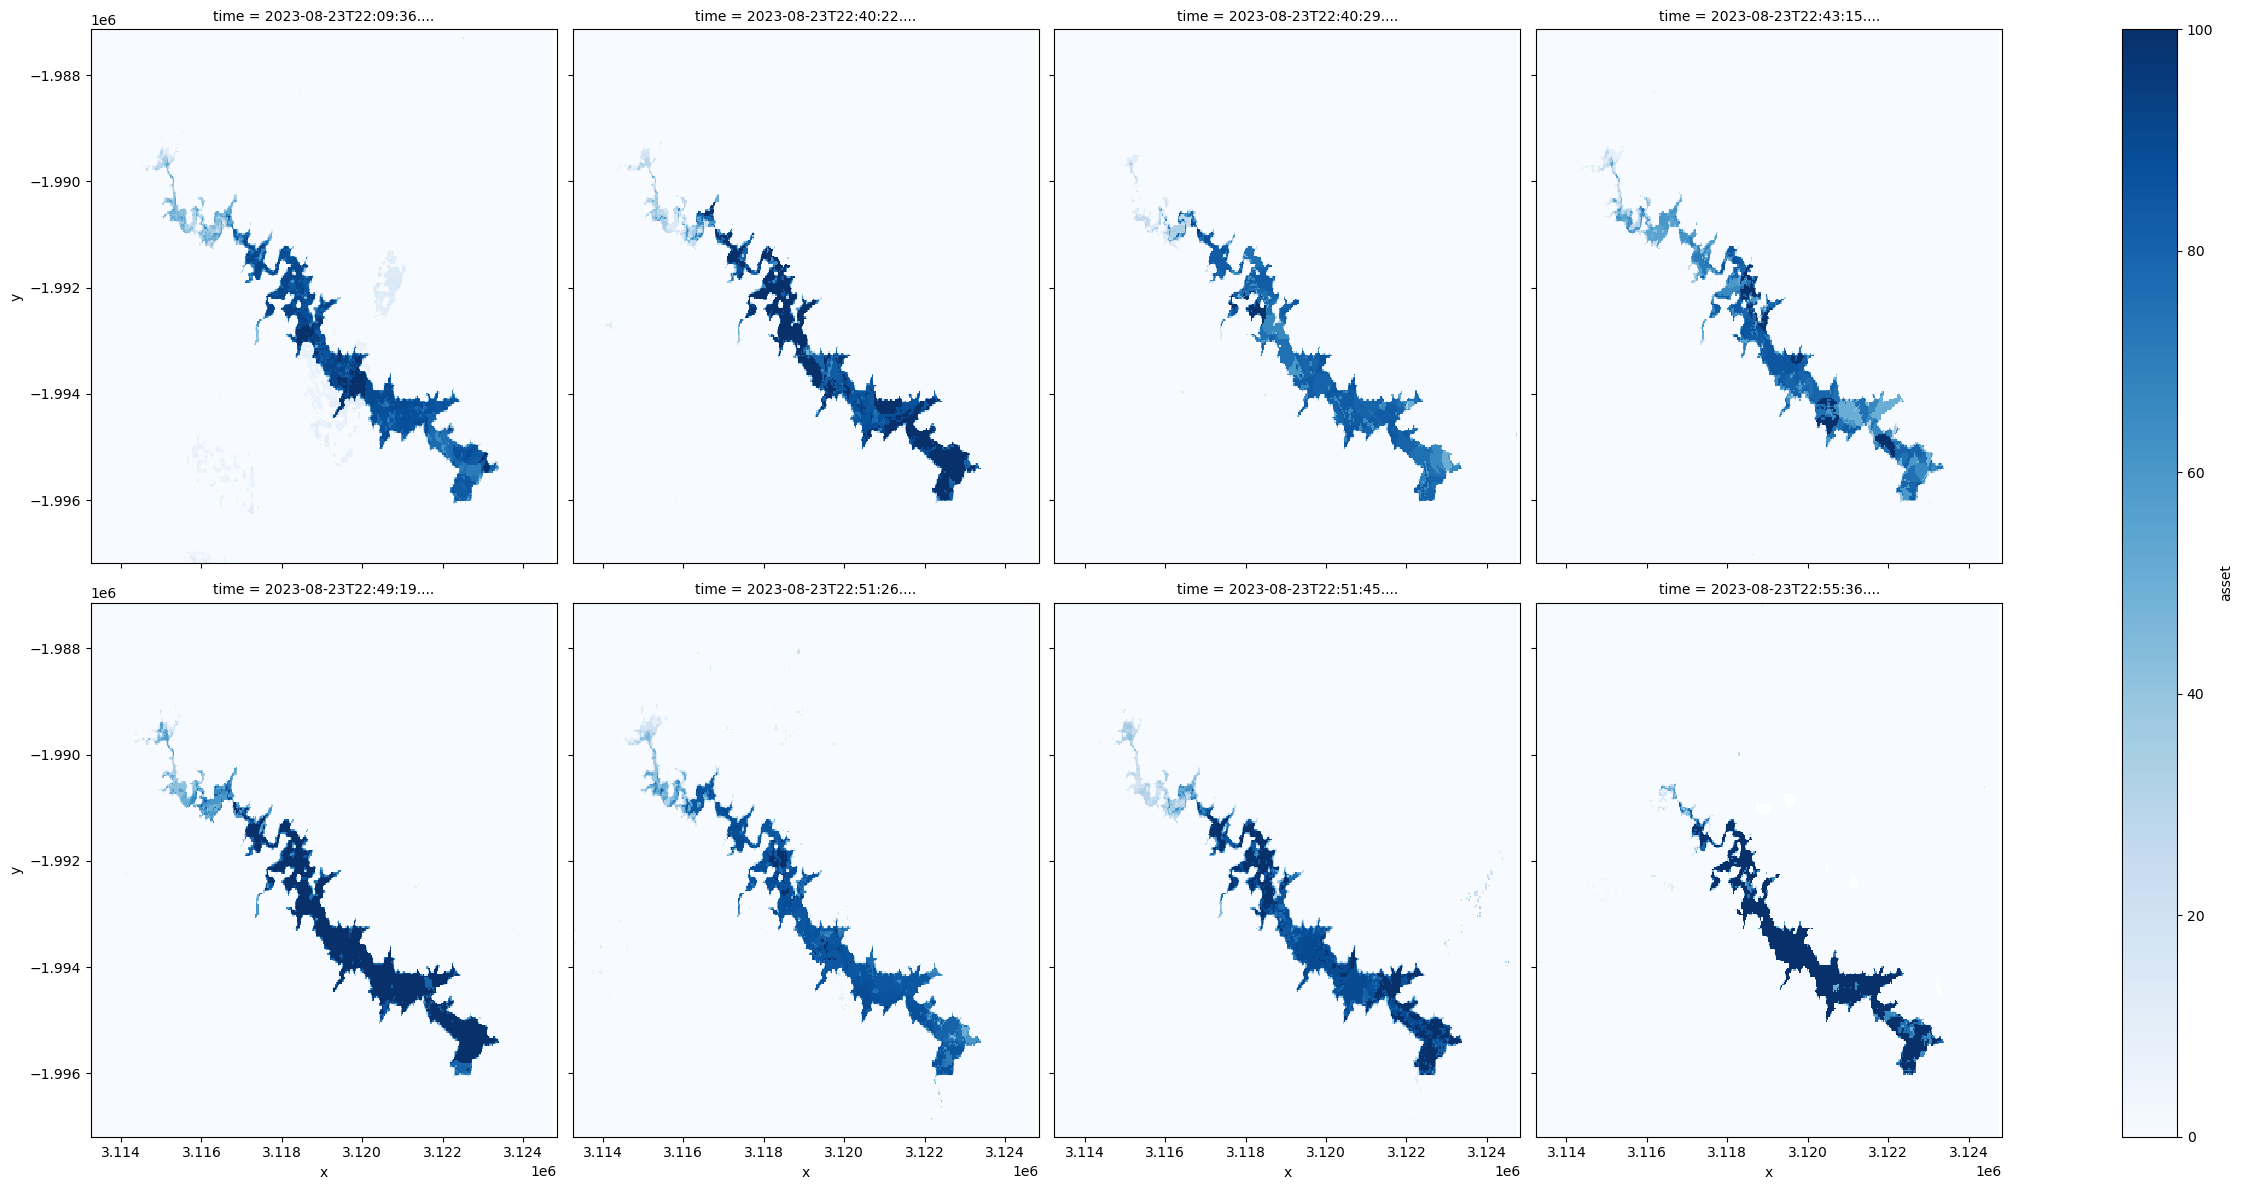

In [11]:
data.asset.plot(cmap="Blues", col="time", col_wrap=4, size=6)

In [12]:
# DEP / depal approach

dep.explore()

AttributeError: module 'depal' has no attribute 'explore'

In [ ]:
# ODC DEA approach
display_map()

In [ ]:
import leafmap.leafmap as leafmap

In [ ]:
leafmap

In [ ]:
import leafmap
m = leafmap.Map(center=(85, 33), zoom=4)
m
